In [1]:
library(tidyverse)
library(glue)
library(dplyr)

install.packages("showtext")
install.packages("extrafont")
library(extrafont)
font_import()


theme_rangeframe <- function(size = 0.3) {
    theme(
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )
}

scale_axis_rangeframe <- function() {
    guides(x = "axis_truncated", y = "axis_truncated")
}

rotate_x_text <- function(angle=45) {
    theme(
        axis.text.x = element_text(angle = angle, hjust = 1)
    )
}

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}

no_legend <- function() {
    theme(
        legend.position = "none"
    )
}

no_margin <- function() {
    theme(
        plot.margin = margin(0, 0, 0, 0, unit = "lines")
    )
}

no_label <- function() {
    theme(
        axis.title = element_blank()
    )
}

no_text <- function() {
    theme(
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()
    )
}

no_x_text <- function() {
    theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )
}

no_y_text <- function() {
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
    )
}


custom_theme <- function(size = 0.3){
    theme_minimal() +
    theme(
        text = element_text(family='Helvetica'),
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )

}
theme_set(custom_theme())

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}


Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Bold.ttf
 : DejaVuSans-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-BoldOblique.ttf
 : DejaVuSans-BoldOblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-ExtraLight.ttf
 : DejaVuSans-ExtraLight already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Oblique.ttf
 : DejaVuSans-Oblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans.ttf
 : DejaVuSans already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-Bold.ttf
 : DejaVuSansCondensed-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-BoldOblique.ttf
 : DejaVuSansCondensed-BoldOblique already registered in fonts d

In [20]:
log_fold_changes <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/analysis/combosciplex/logfoldchanges_split_3.csv") 

New names:
• `` -> `...1`
Rows: 14000 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): group_pred, names_pred, condition_gene, group_true, names_true
dbl (9): ...1, scores_pred, logfoldchanges_pred, pvals_pred, pvals_adj_pred,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [21]:
output_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/figures/combosciplex/logfoldchanges"

In [22]:
unique_vals <- c('Panobinostat+Crizotinib','Panobinostat+Curcumin','Panobinostat+SRT1720','Panobinostat+Sorafenib','SRT2104+Alvespimycin','control+Alvespimycin','control+Dacinostat'
                )

In [23]:
data_dir <- "/lustre/groups/ml01/workspace/ot_perturbation/analysis/combosciplex/embedding"

New names:
• `` -> `...1`
Rows: 50 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): group_pred, names_pred, condition_gene, group_true, names_true
dbl (9): ...1, scores_pred, logfoldchanges_pred, pvals_pred, pvals_adj_pred,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


[1] 0.7084201
[1] "Panobinostat+Crizotinib"


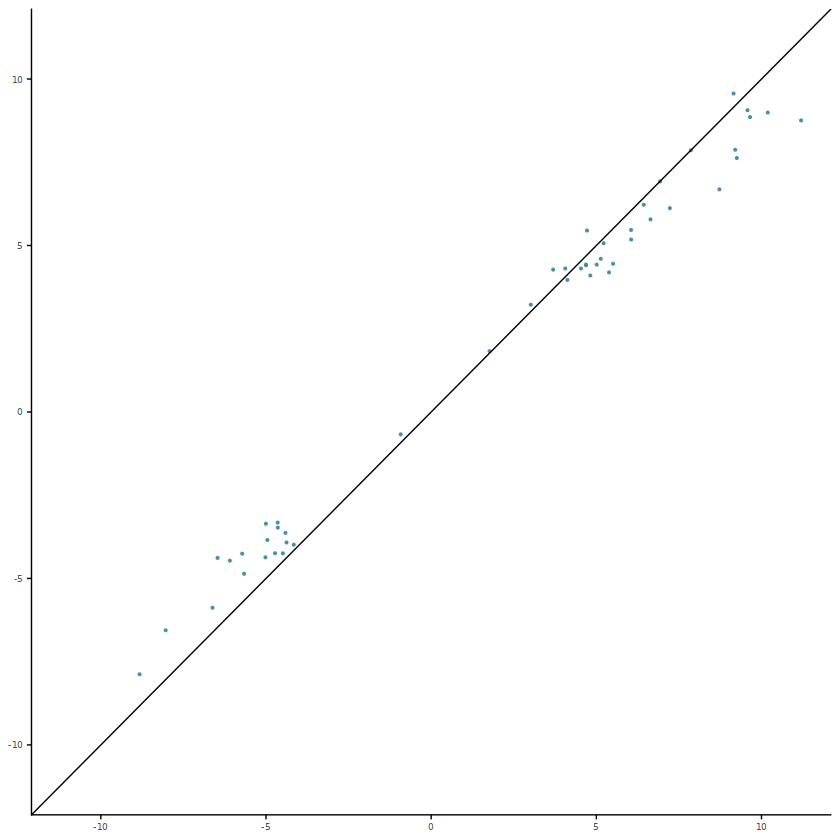

In [24]:
el <- unique_vals[[1]]
df1 <- read_csv(file.path(data_dir, glue("deg_{el}.csv")))

model <- lm(logfoldchanges_pred ~ logfoldchanges_true, data = df1)
r_squared <- summary(model)$r.squared

p <- ggplot(df1, aes(x = logfoldchanges_true, y = logfoldchanges_pred)) +
  geom_point(size = 0.1, alpha = 0.9, color="#3F8AA6") +  # Adjusting point size and adding transparency
  scale_color_manual(values = c("TRUE" = "blue", "FALSE" = "gray")) +
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim=c(-11, 11), ylim = c(-11, 11)) + 
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
)
ggsave(file.path(output_dir, "logfoldchanges_1.pdf"), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")  # Adjust height to accommodate the annotation
p
print(r_squared)
print(unique_vals[[1]])


New names:
• `` -> `...1`
Rows: 50 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): group_pred, names_pred, condition_gene, group_true, names_true
dbl (9): ...1, scores_pred, logfoldchanges_pred, pvals_pred, pvals_adj_pred,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


[1] 0.9908923
[1] "Panobinostat+Curcumin"


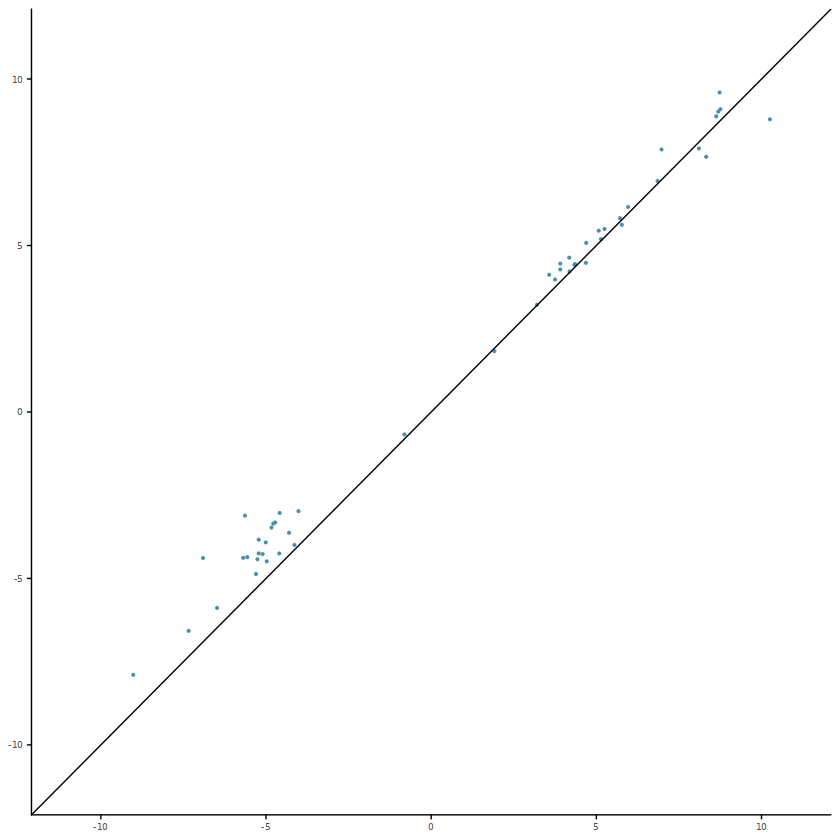

In [25]:
el <- unique_vals[[2]]
df1 <- read_csv(file.path(data_dir, glue("deg_{el}.csv")))

model <- lm(logfoldchanges_pred ~ logfoldchanges_true, data = df1)
r_squared <- summary(model)$r.squared

p <- ggplot(df1, aes(x = logfoldchanges_true, y = logfoldchanges_pred)) +
  geom_point(size = 0.1, alpha = 0.9, color="#3F8AA6") +  # Adjusting point size and adding transparency
  scale_color_manual(values = c("TRUE" = "blue", "FALSE" = "gray")) +
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim=c(-11, 11), ylim = c(-11, 11)) + 
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
)
ggsave(file.path(output_dir, "logfoldchanges_2.pdf"), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")  # Adjust height to accommodate the annotation
p
print(r_squared)
print(unique_vals[[2]])


New names:
• `` -> `...1`
Rows: 50 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): group_pred, names_pred, condition_gene, group_true, names_true
dbl (9): ...1, scores_pred, logfoldchanges_pred, pvals_pred, pvals_adj_pred,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


[1] 0.9867809
[1] "Panobinostat+SRT1720"


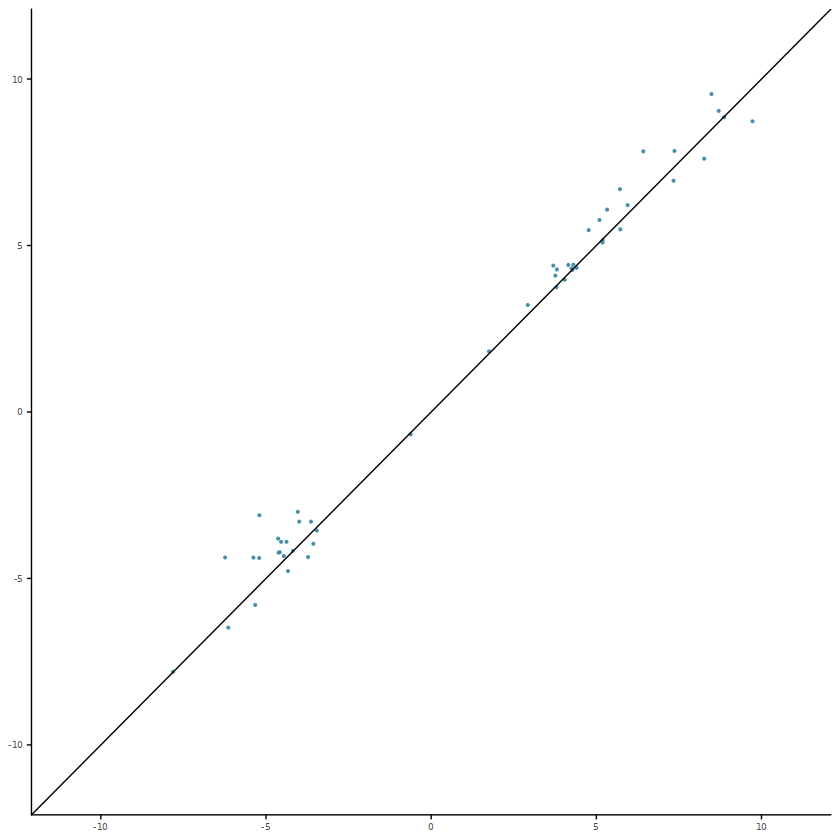

In [26]:
el <- unique_vals[[3]]
df1 <- read_csv(file.path(data_dir, glue("deg_{el}.csv")))

model <- lm(logfoldchanges_pred ~ logfoldchanges_true, data = df1)
r_squared <- summary(model)$r.squared

p <- ggplot(df1, aes(x = logfoldchanges_true, y = logfoldchanges_pred)) +
  geom_point(size = 0.1, alpha = 0.9, color="#3F8AA6") +  # Adjusting point size and adding transparency
  scale_color_manual(values = c("TRUE" = "blue", "FALSE" = "gray")) +
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim=c(-11, 11), ylim = c(-11, 11)) + 
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
)
ggsave(file.path(output_dir, "logfoldchanges_3.pdf"), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")  # Adjust height to accommodate the annotation
p
print(r_squared)
print(unique_vals[[3]])


New names:
• `` -> `...1`
Rows: 50 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): group_pred, names_pred, condition_gene, group_true, names_true
dbl (9): ...1, scores_pred, logfoldchanges_pred, pvals_pred, pvals_adj_pred,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


[1] 0.7856165
[1] "Panobinostat+Sorafenib"


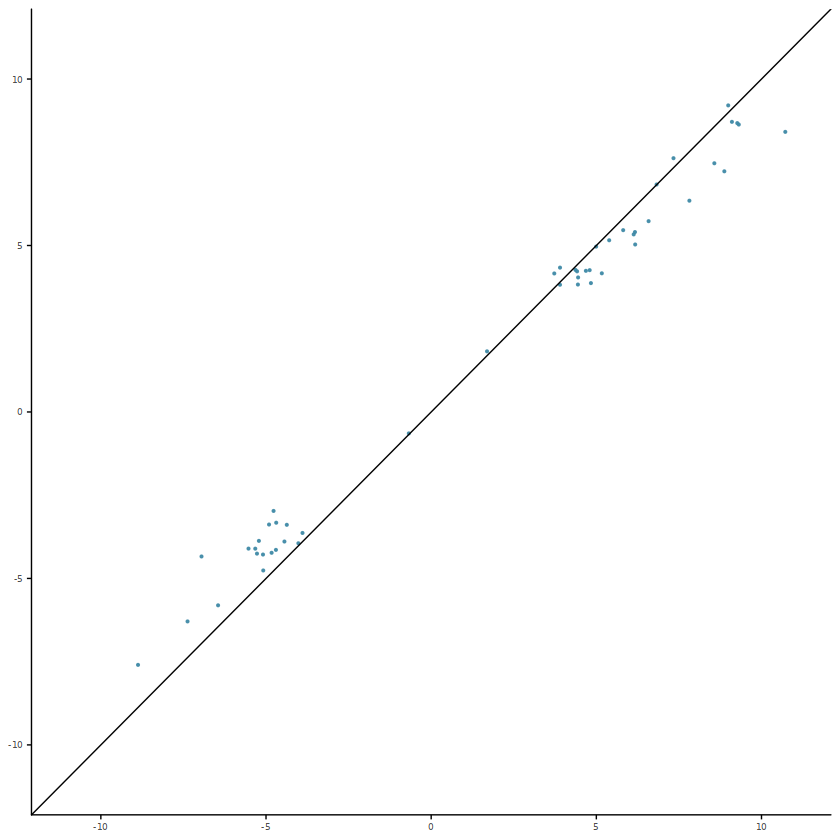

In [27]:
el <- unique_vals[[4]]
df1 <- read_csv(file.path(data_dir, glue("deg_{el}.csv")))

model <- lm(logfoldchanges_pred ~ logfoldchanges_true, data = df1)
r_squared <- summary(model)$r.squared

p <- ggplot(df1, aes(x = logfoldchanges_true, y = logfoldchanges_pred)) +
  geom_point(size = 0.1, alpha = 0.9, color="#3F8AA6") +  # Adjusting point size and adding transparency
  scale_color_manual(values = c("TRUE" = "blue", "FALSE" = "gray")) +
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim=c(-11, 11), ylim = c(-11, 11)) + 
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
)
ggsave(file.path(output_dir, "logfoldchanges_4.pdf"), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")  # Adjust height to accommodate the annotation
p
print(r_squared)
print(unique_vals[[4]])


New names:
• `` -> `...1`
Rows: 50 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): group_pred, names_pred, condition_gene, group_true, names_true
dbl (9): ...1, scores_pred, logfoldchanges_pred, pvals_pred, pvals_adj_pred,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


[1] 0.3884164
[1] "SRT2104+Alvespimycin"


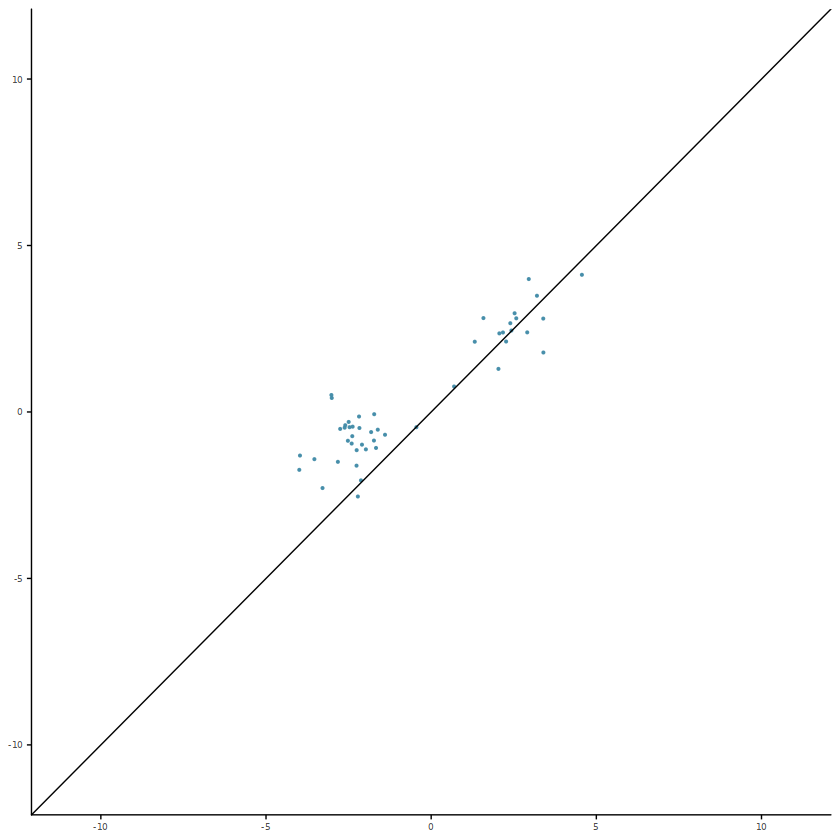

In [28]:
el <- unique_vals[[5]]
df1 <- read_csv(file.path(data_dir, glue("deg_{el}.csv")))

model <- lm(logfoldchanges_pred ~ logfoldchanges_true, data = df1)
r_squared <- summary(model)$r.squared

p <- ggplot(df1, aes(x = logfoldchanges_true, y = logfoldchanges_pred)) +
  geom_point(size = 0.1, alpha = 0.9, color="#3F8AA6") +  # Adjusting point size and adding transparency
  scale_color_manual(values = c("TRUE" = "blue", "FALSE" = "gray")) +
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim=c(-11, 11), ylim = c(-11, 11)) + 
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
)
ggsave(file.path(output_dir, "logfoldchanges_5.pdf"), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")  # Adjust height to accommodate the annotation
p
print(r_squared)
print(unique_vals[[5]])


New names:
• `` -> `...1`
Rows: 50 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): group_pred, names_pred, condition_gene, group_true, names_true
dbl (9): ...1, scores_pred, logfoldchanges_pred, pvals_pred, pvals_adj_pred,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


[1] 0.8355254
[1] "control+Alvespimycin"


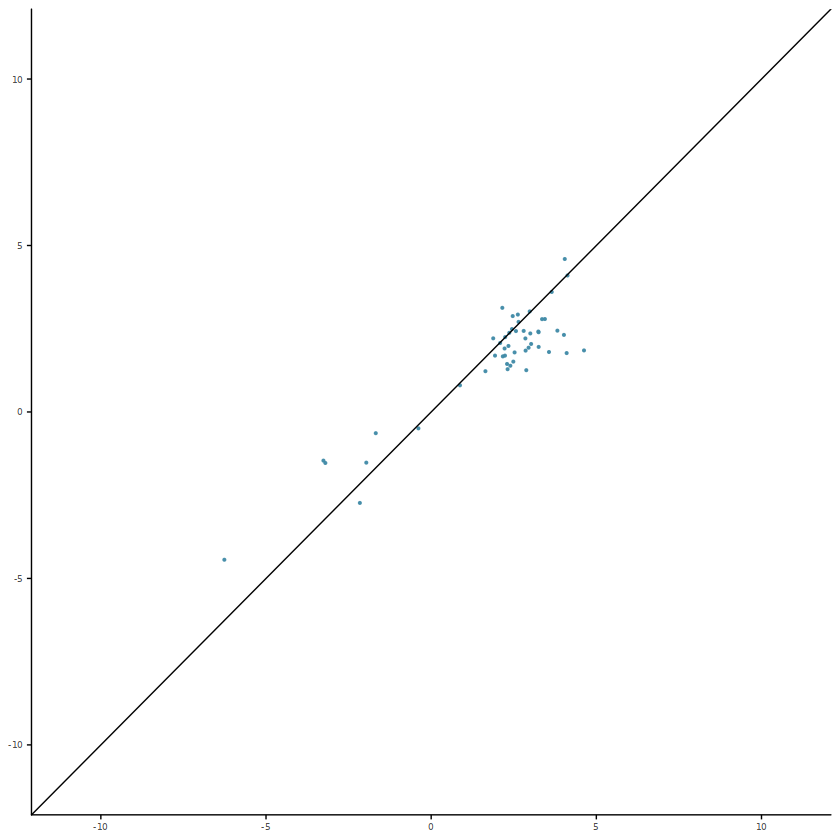

In [29]:
el <- unique_vals[[6]]
df1 <- read_csv(file.path(data_dir, glue("deg_{el}.csv")))

model <- lm(logfoldchanges_pred ~ logfoldchanges_true, data = df1)
r_squared <- summary(model)$r.squared

p <- ggplot(df1, aes(x = logfoldchanges_true, y = logfoldchanges_pred)) +
  geom_point(size = 0.1, alpha = 0.9, color="#3F8AA6") +  # Adjusting point size and adding transparency
  scale_color_manual(values = c("TRUE" = "blue", "FALSE" = "gray")) +
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim=c(-11, 11), ylim = c(-11, 11)) + 
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
)
ggsave(file.path(output_dir, "logfoldchanges_6.pdf"), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")  # Adjust height to accommodate the annotation
p
print(r_squared)
print(unique_vals[[6]])


New names:
• `` -> `...1`
Rows: 50 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): group_pred, names_pred, condition_gene, group_true, names_true
dbl (9): ...1, scores_pred, logfoldchanges_pred, pvals_pred, pvals_adj_pred,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


[1] 0.9610172
[1] "control+Dacinostat"


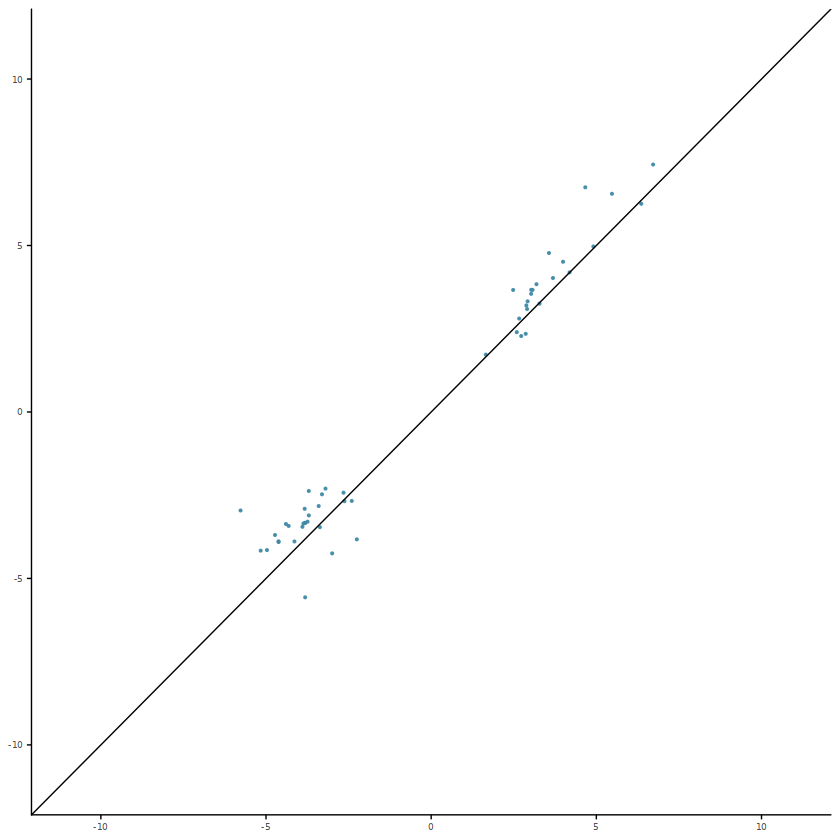

In [30]:
el <- unique_vals[[7]]
df1 <- read_csv(file.path(data_dir, glue("deg_{el}.csv")))

model <- lm(logfoldchanges_pred ~ logfoldchanges_true, data = df1)
r_squared <- summary(model)$r.squared

p <- ggplot(df1, aes(x = logfoldchanges_true, y = logfoldchanges_pred)) +
  geom_point(size = 0.1, alpha = 0.9, color="#3F8AA6") +  # Adjusting point size and adding transparency
  scale_color_manual(values = c("TRUE" = "blue", "FALSE" = "gray")) +
  geom_abline(slope = 1, intercept = 0, color="black", size=0.3) +
  coord_cartesian(xlim=c(-11, 11), ylim = c(-11, 11)) + 
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
)
ggsave(file.path(output_dir, "logfoldchanges_7.pdf"), plot = p, device = "pdf", width = 2.3, height = 2.3, unit="cm")  # Adjust height to accommodate the annotation
p
print(r_squared)
print(unique_vals[[7]])
